In [256]:
# Import required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Load Polygon (Matic) price data
df_matic = pd.read_csv('matic-usd-max.csv', parse_dates=['snapped_at'], index_col='snapped_at')
df_matic.index.tz_localize(None)
df_matic.index = df_matic.index.date
df_matic.index = pd.to_datetime(df_matic.index)

print(df_matic)

# Load Top 30 Crypto Index data
df_X30 = pd.read_csv('X30.csv', parse_dates=['timestamp'], index_col='timestamp')
df_X30 = df_X30.resample('D').last()  # Resample the data to get the last value for each day
df_X30.index.tz_localize(None)
df_X30.index = df_X30.index.date
df_X30.index = pd.to_datetime(df_X30.index)

print(df_X30)

# Load unlock schedule
df_tu = pd.read_csv('chartData_Polygon_matic-network.csv', parse_dates=['name'], index_col='name')
df_tu = df_tu.resample('D').last()  # Resample the data to get the last value for each day
df_tu.index.tz_localize(None)
df_tu.index = pd.to_datetime(df_tu.index)

print(df_tu)

               price    market_cap  total_volume
2019-04-27  0.005470  1.159800e+07  4.315835e+07
2019-04-28  0.005207  1.103852e+07  9.750768e+06
2019-04-29  0.004381  9.288212e+06  8.388214e+06
2019-04-30  0.003528  7.477598e+06  8.206900e+06
2019-05-01  0.004396  9.332879e+06  2.399617e+07
...              ...           ...           ...
2023-07-06  0.671003  6.259604e+09  2.242881e+08
2023-07-07  0.664928  6.208407e+09  3.165971e+08
2023-07-08  0.675566  6.295315e+09  1.914789e+08
2023-07-09  0.679932  6.335032e+09  1.367506e+08
2023-07-10  0.687803  6.405797e+09  1.819549e+08

[1536 rows x 3 columns]
                   X30
2020-01-01  100.000000
2020-01-02   96.735314
2020-01-03  102.005941
2020-01-04  103.232880
2020-01-05  103.874767
...                ...
2023-07-06  557.586570
2023-07-07  565.038189
2023-07-08  566.078429
2023-07-09  563.123039
2023-07-10  564.543423

[1287 rows x 1 columns]
            Binance IEO Investors     Ecosystem    Foundation        Team  \
name     

In [268]:
df_matic_price = df_matic['price']
df_unlocks = df_tu.sum(axis=1).resample('D').sum()


def normalize(df_price, df_index, df_unlock, period):
    merged_df = pd.concat([df_price, df_index, df_unlock], axis=1, keys=['p', 'i', 'u'])
    merged_df = merged_df.dropna()
    resampled_df = merged_df.resample(f'{period}').mean()
    resampled_df_pct = resampled_df.pct_change()
    
    price_change_pct = (resampled_df_pct['p']['price'] - resampled_df_pct['i']['X30']) * 100
    unlocks_change_pct = resampled_df['u'][0].pct_change()*100
    return price_change_pct.dropna(), unlocks_change_pct.dropna()

df_matic_price_change_normalized_daily, df_unlocks_change_daily = normalize(df_matic_price, df_X30, df_unlocks, '1D')
df_matic_price_change_normalized_monthly, df_unlocks_change_monthly = normalize(df_matic_price, df_X30, df_unlocks, '1M')
df_matic_price_change_normalized_quarterly, df_unlocks_change_quarterly = normalize(df_matic_price, df_X30, df_unlocks, '3M')
df_matic_price_change_normalized_biannually, df_unlocks_change_biannually = normalize(df_matic_price, df_X30, df_unlocks, '6M')
df_matic_price_change_normalized_annually, df_unlocks_change_annually = normalize(df_matic_price, df_X30, df_unlocks, '1Y')

In [269]:
# Calculate the correlation
correlation_daily = df_unlocks_change_daily.corr(df_matic_price_change_normalized_daily)  # Calculate the correlation for monthly data
correlation_monthly = df_unlocks_change_monthly.corr(df_matic_price_change_normalized_monthly)  # Calculate the correlation for monthly data
correlation_quarterly = df_unlocks_change_quarterly.corr(df_matic_price_change_normalized_quarterly)  # Calculate the correlation for quarterly data
correlation_biannually = df_unlocks_change_biannually.corr(df_matic_price_change_normalized_biannually)  # Calculate the correlation for biannual data
correlation_annually = df_unlocks_change_annually.corr(df_matic_price_change_normalized_annually)  # Calculate the correlation for annual data

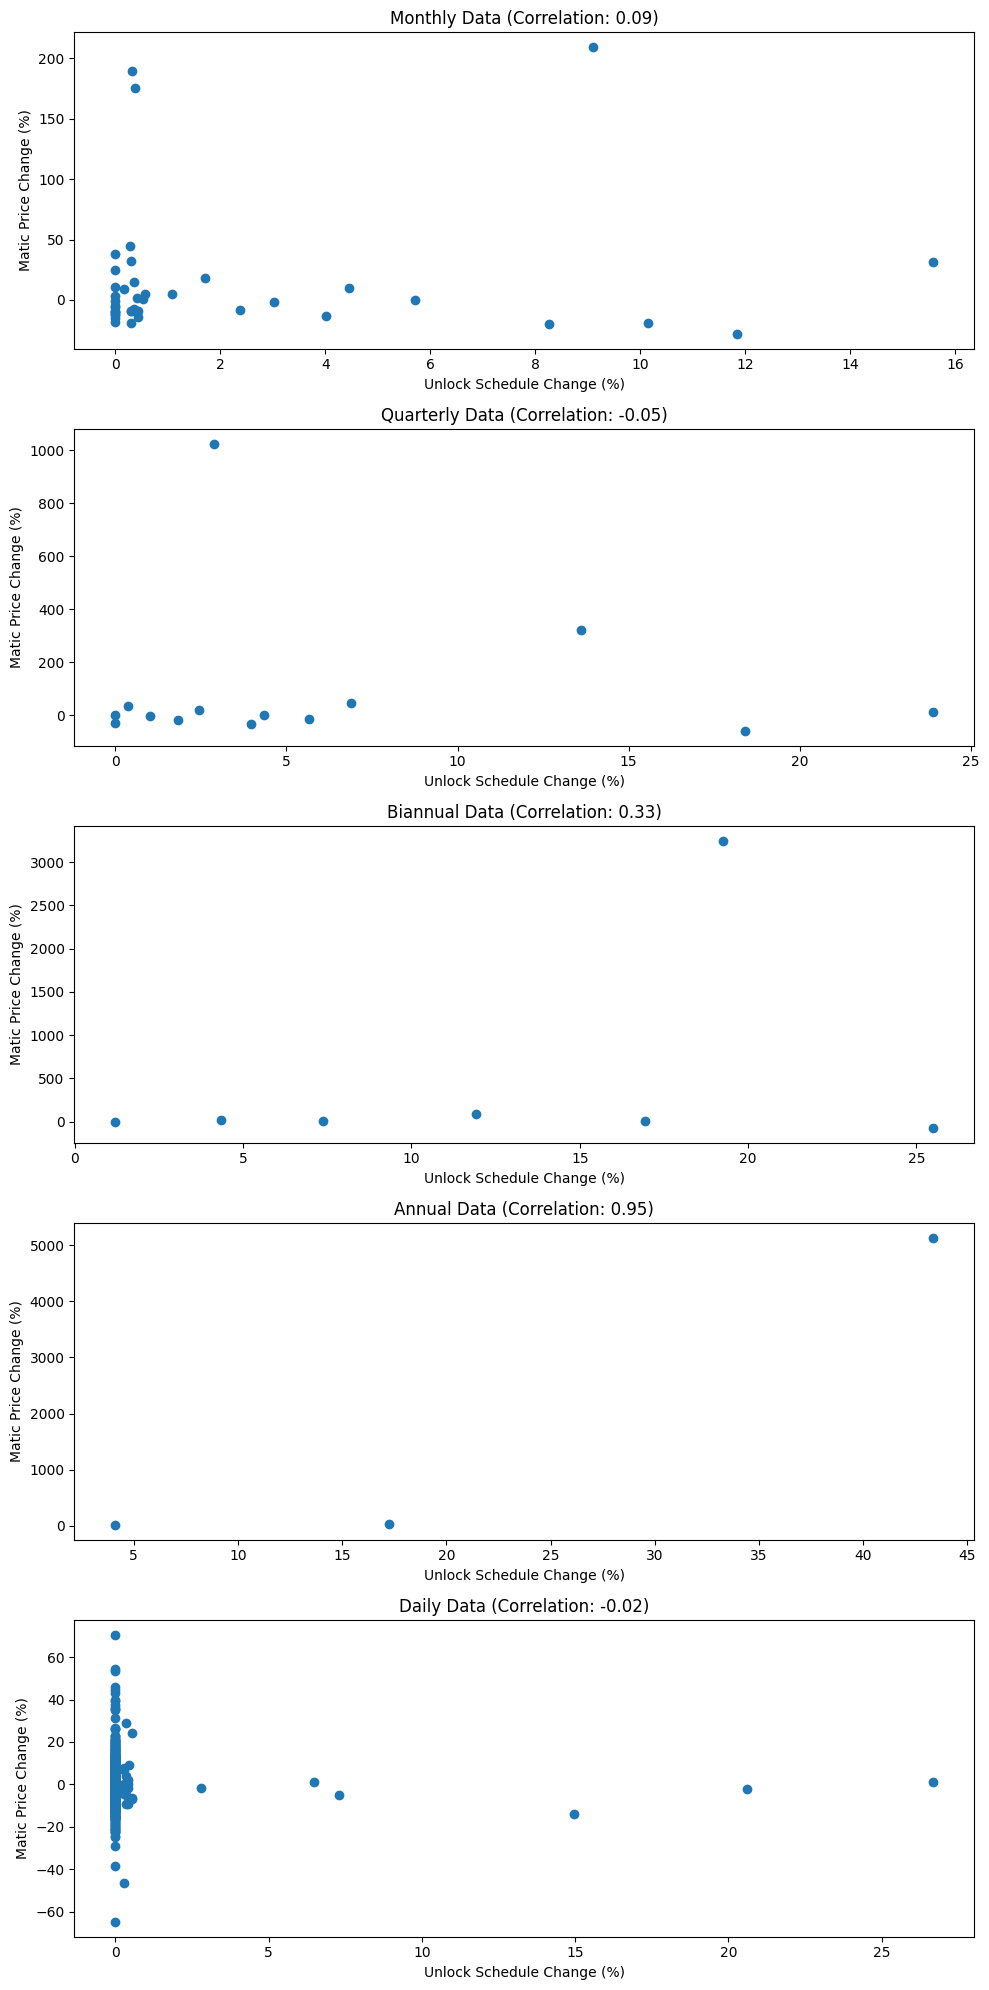

In [273]:
fig, axs = plt.subplots(5, 1, figsize=(10, 20))

# Scatter plot for monthly data
axs[0].scatter(df_unlocks_change_monthly, df_matic_price_change_normalized_monthly)
axs[0].set_title(f'Monthly Data (Correlation: {correlation_monthly:.2f})')
axs[0].set_xlabel('Unlock Schedule Change (%)')
axs[0].set_ylabel('Matic Price Change (%)')

# Scatter plot for quarterly data
axs[1].scatter(df_unlocks_change_quarterly, df_matic_price_change_normalized_quarterly)
axs[1].set_title(f'Quarterly Data (Correlation: {correlation_quarterly:.2f})')
axs[1].set_xlabel('Unlock Schedule Change (%)')
axs[1].set_ylabel('Matic Price Change (%)')

# Scatter plot for biannual data
axs[2].scatter(df_unlocks_change_biannually, df_matic_price_change_normalized_biannually)
axs[2].set_title(f'Biannual Data (Correlation: {correlation_biannually:.2f})')
axs[2].set_xlabel('Unlock Schedule Change (%)')
axs[2].set_ylabel('Matic Price Change (%)')

# Scatter plot for annual data
axs[3].scatter(df_unlocks_change_annually, df_matic_price_change_normalized_annually)
axs[3].set_title(f'Annual Data (Correlation: {correlation_annually:.2f})')
axs[3].set_xlabel('Unlock Schedule Change (%)')
axs[3].set_ylabel('Matic Price Change (%)')

# Scatter plot for daily data
axs[4].scatter(df_unlocks_change_daily, df_matic_price_change_normalized_daily)
axs[4].set_title(f'Daily Data (Correlation: {correlation_daily:.2f})')
axs[4].set_xlabel('Unlock Schedule Change (%)')
axs[4].set_ylabel('Matic Price Change (%)')

plt.tight_layout()
plt.show()


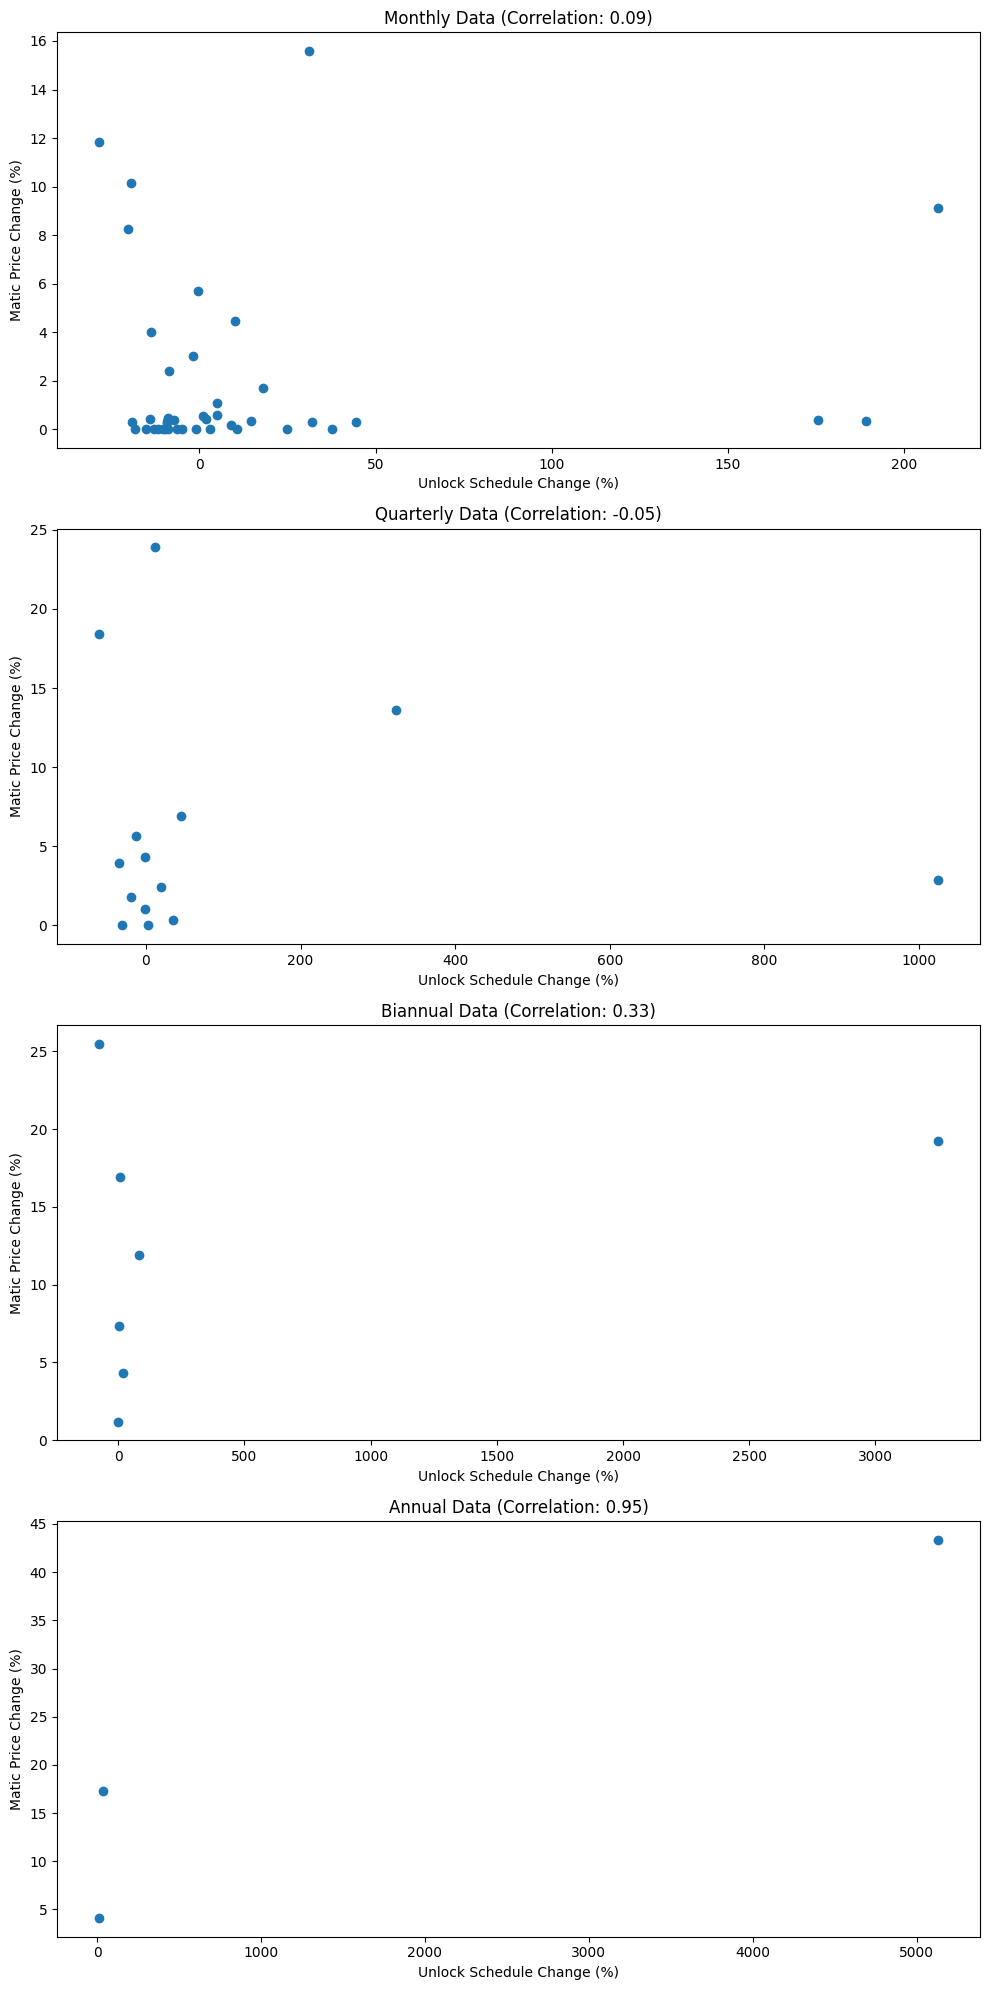

In [255]:
import pandas as pd
from matplotlib import pyplot as plt

def load_data(file, index_col, date_col):
    df = pd.read_csv(file, parse_dates=[date_col], index_col=index_col)
    df.index.tz_localize(None)
    df.index = pd.to_datetime(df.index.date)
    return df

def normalize(df_price, df_index, df_unlock, period):
    merged_df = pd.concat([df_price, df_index, df_unlock], axis=1, keys=['p', 'i', 'u'])
    merged_df = merged_df.dropna()
    resampled_df = merged_df.resample(f'{period}').mean()
    resampled_df_pct = resampled_df.pct_change()

    price_change_pct = (resampled_df_pct['p']['price'] - resampled_df_pct['i']['X30']) * 100
    unlocks_change_pct = resampled_df['u'][0].pct_change()*100
    return price_change_pct.dropna(), unlocks_change_pct.dropna()

def plot_correlations(data, labels):
    fig, axs = plt.subplots(len(data), 1, figsize=(10, len(data)*5))
    for i, ((x, y), (title, xlabel, ylabel)) in enumerate(zip(data, labels)):
        correlation = x.corr(y)
        axs[i].scatter(x, y)
        axs[i].set_title(f'{title} (Correlation: {correlation:.2f})')
        axs[i].set_xlabel(xlabel)
        axs[i].set_ylabel(ylabel)
    plt.tight_layout()
    plt.show()

# Load the data
df_matic = load_data('matic-usd-max.csv', 'snapped_at', 'snapped_at')['price']
df_X30 = load_data('X30.csv', 'timestamp', 'timestamp').resample('D').last()
df_unlocks = load_data('chartData_Polygon_matic-network.csv', 'name', 'name').sum(axis=1).resample('D').sum()

# Normalize the data
data_monthly = normalize(df_matic, df_X30, df_unlocks, '1M')
data_quarterly = normalize(df_matic, df_X30, df_unlocks, '3M')
data_biannually = normalize(df_matic, df_X30, df_unlocks, '6M')
data_annually = normalize(df_matic, df_X30, df_unlocks, '1Y')

# Plot the correlations3
data = [data_monthly, data_quarterly, data_biannually, data_annually]
labels = [
    ('Monthly Data', 'Unlock Schedule Change (%)', 'Matic Price Change (%)'),
    ('Quarterly Data', 'Unlock Schedule Change (%)', 'Matic Price Change (%)'),
    ('Biannual Data', 'Unlock Schedule Change (%)', 'Matic Price Change (%)'),
    ('Annual Data', 'Unlock Schedule Change (%)', 'Matic Price Change (%)'),
]
plot_correlations(data, labels)
